# **Proyek Analisis Data: Penyewaan Sepeda**

**Nama : Ikrom Nur Muhammad Al-habib**

**Kelas Bangkit : ML-74**

**Dicoding ID : ikromnur**

# **Menentukan Pertanyaan Bisnis:**

- Bagaimana pengaruh cuaca (weather situation) terhadap jumlah peminjaman sepeda?

- Apakah jumlah peminjaman sepeda bervariasi di setiap musim, dan bagaimana strategi optimalnya?

# **Menyiapkan semua library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.11.2
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.18.0.35.2
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.

# **1. Data Wrangling**

## **1.1 Gathering Data**

In [30]:
day_data = pd.read_csv(r'/content/sample_data/data_1.csv')
hour_data = pd.read_csv(r'/content/sample_data/data_2.csv')

In [31]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
print("Dimensi dataset hour.csv:", hour_data.shape)
print("Dimensi dataset day.csv:", day_data.shape)

Dimensi dataset hour.csv: (17379, 17)
Dimensi dataset day.csv: (731, 16)


**Insight:**
1. **Jumlah Data:**
Dataset hour.csv memiliki 17,379 baris dan 17 kolom, sedangkan day.csv memiliki 731 baris dan 16 kolom. Hal ini menunjukkan bahwa hour.csv mencatat data per jam, sementara day.csv menyajikan ringkasan data harian.

## **1.2 Assesing Data**

**1.2.1 Cek Tipe Data**

In [34]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [35]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**1.2.2 Cek Missing Value**

In [36]:
print("\nMissing values in the day dataset:")
print(day_data.isnull().sum())
print("\nMissing values in the hour dataset:")
print(hour_data.isnull().sum())



Missing values in the day dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in the hour dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**1.2.3 Cek Data Duplikat**

In [37]:

print("\nData duplikat di day dataset:", day_data.duplicated().sum())
print("Data duplikat di hour dataset:", hour_data.duplicated().sum())




Data duplikat di day dataset: 0
Data duplikat di hour dataset: 0


**1.2.4 Cek Outlier**

In [38]:
def outlier(data):
    columns = data.select_dtypes(include=('int64', 'float64')).columns
    outlier_counts = {}
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts_day = outlier(day_data)

# Mengubah dictionary outlier_counts menjadi DataFrame
outlier_day = pd.DataFrame(list(outlier_counts_day.items()), columns=['Column', 'Outlier Count'])
print(outlier_day)

        Column  Outlier Count
0      instant              0
1       season              0
2           yr              0
3         mnth              0
4      holiday             21
5      weekday              0
6   workingday              0
7   weathersit              0
8         temp              0
9        atemp              0
10         hum              2
11   windspeed             13
12      casual             44
13  registered              0
14         cnt              0


In [39]:
def outlier(data):
    columns = data.select_dtypes(include=('int64', 'float64')).columns
    outlier_counts = {}
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts_hour = outlier(hour_data)

# Mengubah dictionary outlier_counts menjadi DataFrame
outlier_hour = pd.DataFrame(list(outlier_counts_hour.items()), columns=['Column', 'Outlier Count'])
print(outlier_hour)

        Column  Outlier Count
0      instant              0
1       season              0
2           yr              0
3         mnth              0
4           hr              0
5      holiday            500
6      weekday              0
7   workingday              0
8   weathersit              3
9         temp              0
10       atemp              0
11         hum             22
12   windspeed            342
13      casual           1192
14  registered            680
15         cnt            505


**Insight**

1. **Jenis Kolom:**
Kedua dataset memiliki kolom dteday yang bertipe objek (string). Agar analisis waktu lebih akurat, kolom ini perlu diubah ke tipe datetime. Selain itu, kolom temp, atemp, hum, dan windspeed merupakan data numerik dengan tipe float64, sementara sebagian besar kolom lainnya bertipe int64, yang biasanya digunakan untuk merepresentasikan kategori atau jumlah.

2. **Tidak Ada Data Hilang**:
Berdasarkan ringkasan data, kedua dataset tidak memiliki nilai kosong (null), sehingga tidak diperlukan langkah tambahan untuk mengisi atau membersihkan data yang hilang.

3. **Perbedaan Kolom antara day.csv dan hour.csv**:
Perbedaan utama antara kedua dataset adalah keberadaan kolom hr (jam) di hour.csv, yang tidak terdapat di day.csv. Ini karena hour.csv mencatat data peminjaman sepeda per jam, sedangkan day.csv menyajikan data yang sudah diringkas per hari.

4. **Ada Outlier**:
Pada data day maupun hour tedapat outlier yang dimana akan dibersihkan menggunakan interquartil

In [40]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])


**Mengonversi Tipe Data dteday menjadi datetime**:

Pada kedua dataset, day_data dan hour_data, kolom dteday awalnya memiliki tipe data object (string). Karena kolom ini merepresentasikan tanggal, mengonversinya ke tipe datetime akan memudahkan kita dalam melakukan operasi atau analisis berbasis waktu dengan lebih efektif.

## **1.3 Data Cleaning**

**1.3.1 Hapus Outlier**

In [41]:
def remove_outlier(data):
    numeric_columns = data.select_dtypes(include=('int64', 'float64')).columns
    clean_data = data.copy()  # Membuat salinan DataFrame agar tidak mengubah data asli
    for column in numeric_columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        clean_data = clean_data[(clean_data[column] >= lower_bound) & (clean_data[column] <= upper_bound)]
    return clean_data

data_cleaned_day = remove_outlier(day_data)

In [42]:
def remove_outlier(data):
    numeric_columns = data.select_dtypes(include=('int64', 'float64')).columns
    clean_data = data.copy()  # Membuat salinan DataFrame agar tidak mengubah data asli
    for column in numeric_columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        clean_data = clean_data[(clean_data[column] >= lower_bound) & (clean_data[column] <= upper_bound)]
    return clean_data

data_cleaned_hour = remove_outlier(hour_data)

# **2. Exploratory Data Analysis (EDA)**

## **2.1 Statistika Deskriptif**

In [43]:
day_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [44]:
hour_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## **2.2 Distribusi Variabel**

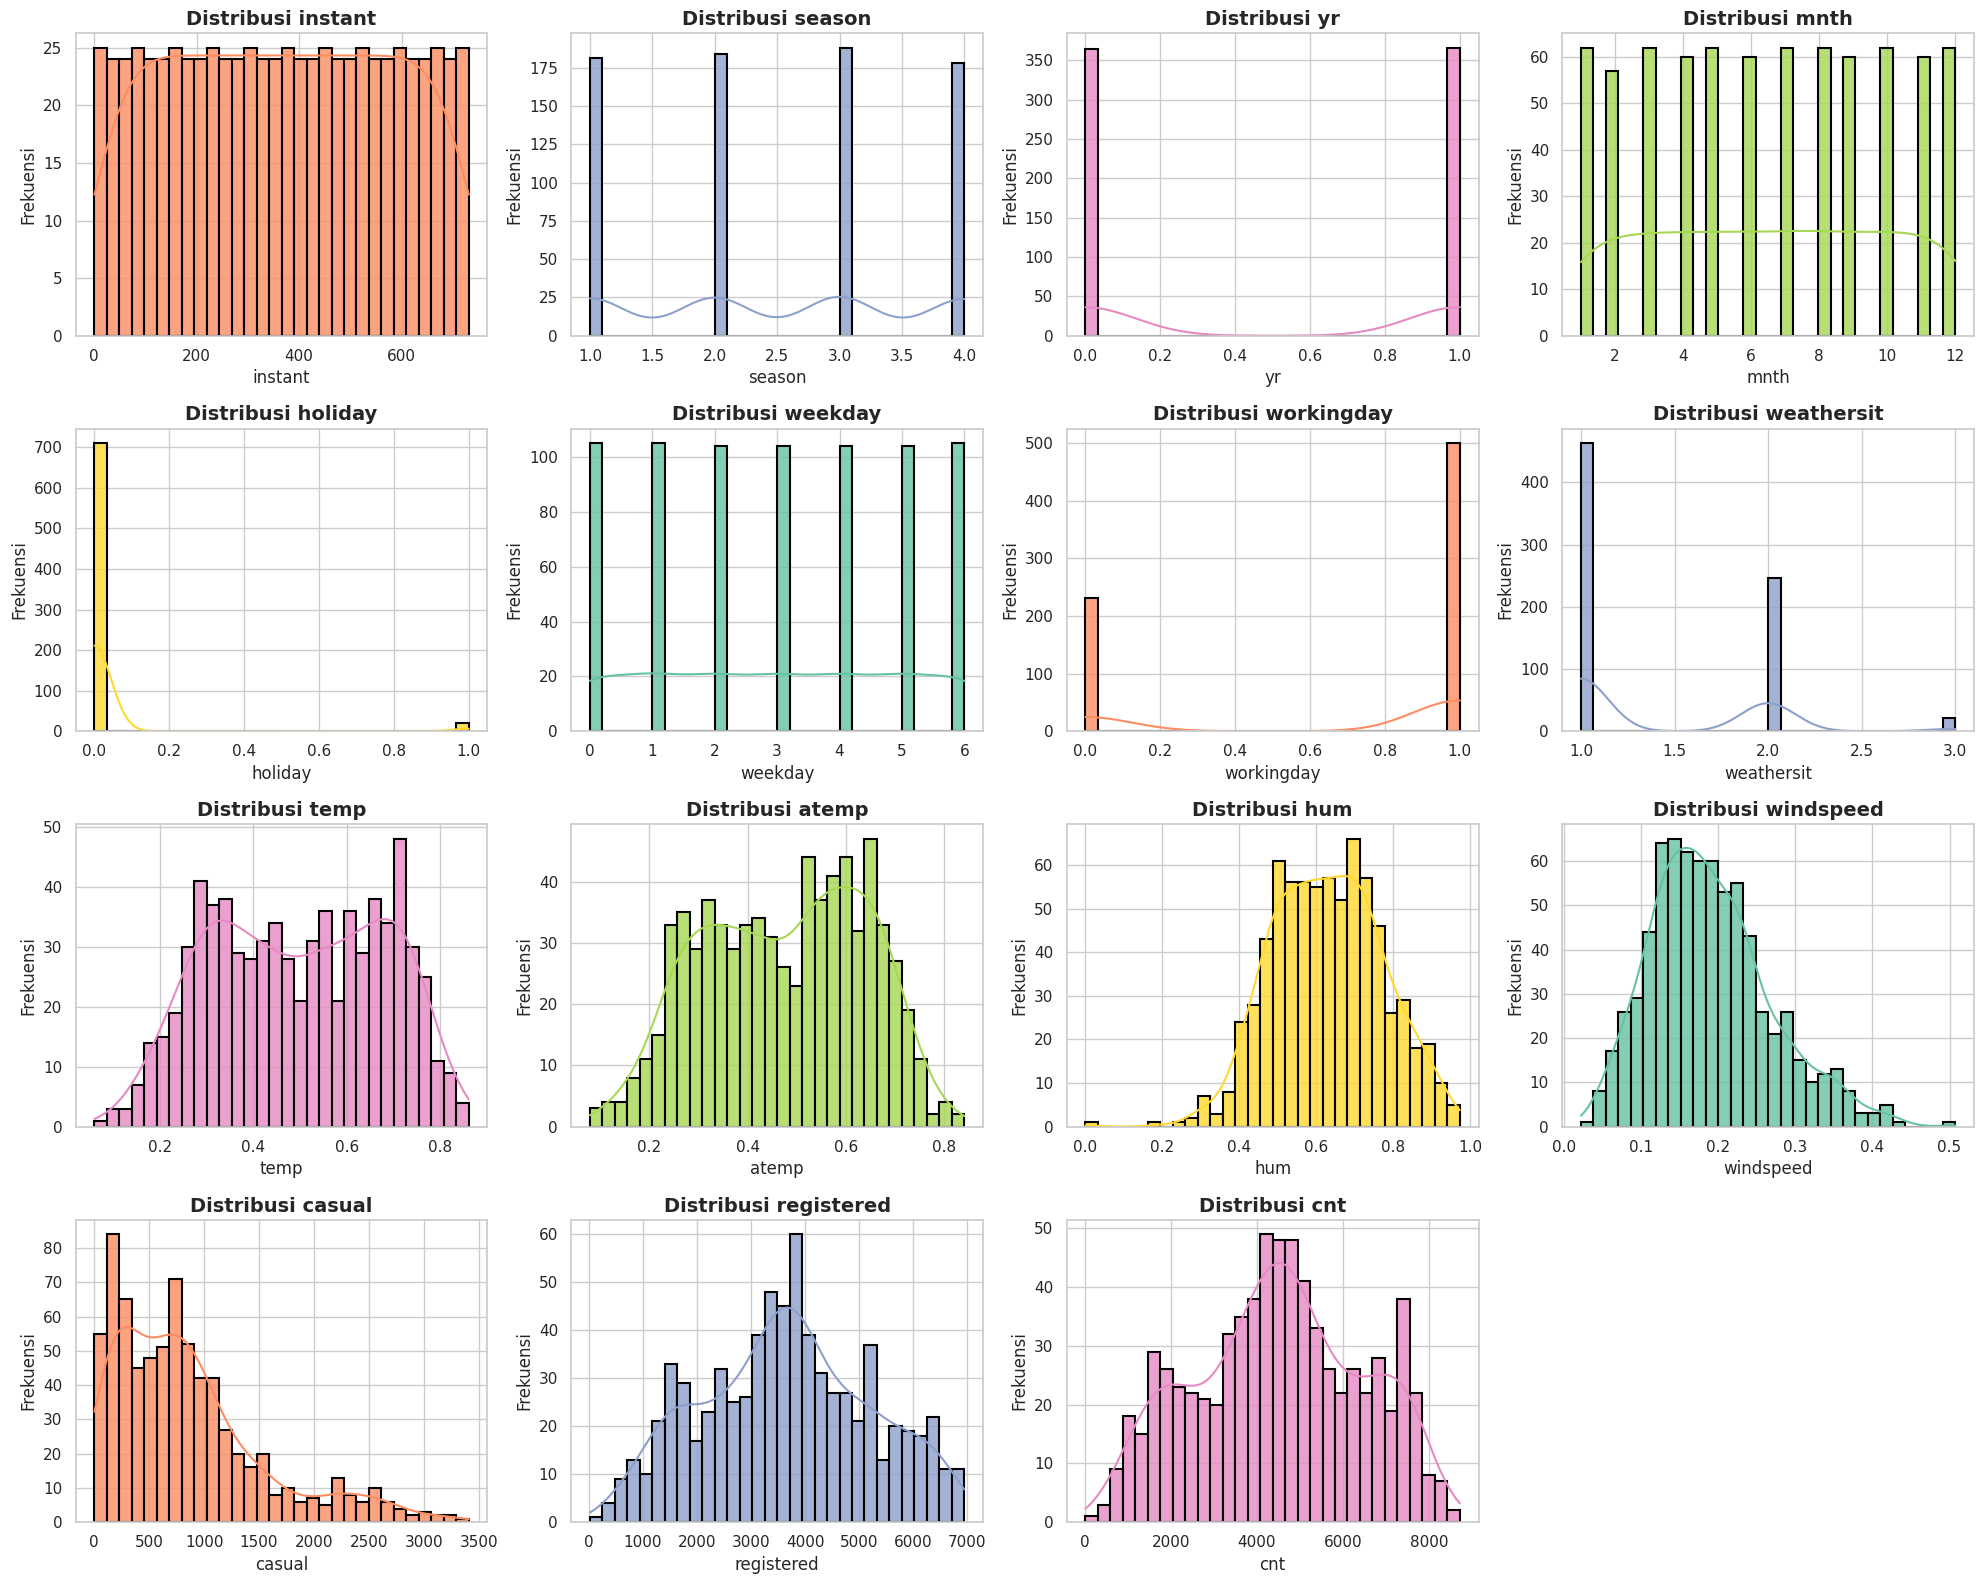

In [45]:
sns.set_theme(style="whitegrid")
numeric_columns_day = day_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns_day, 1):
    plt.subplot(4, 4, i)
    sns.histplot(day_data[column], bins=30, kde=True, color=sns.color_palette("Set2")[i % 6],
                 edgecolor='black', alpha=0.8, linewidth=1.5)
    plt.title(f'Distribusi {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()



**Distribusi Instant**:

Menunjukkan variasi yang cukup besar dengan puncak sekitar nilai 600, mengindikasikan adanya fluktuasi signifikan pada nilai instant.

**Distribusi Season**:

Puncak berada di nilai 3, yang berarti musim gugur (fall) adalah yang paling sering muncul dalam data.

**Distribusi Yr**:

Menunjukkan rentang yang lebar dengan puncak di nilai 0, menandakan bahwa tahun 2011 memiliki frekuensi data lebih tinggi.

**Distribusi Mnth**:

Pola naik turun terlihat jelas, dengan puncak pada bulan ke-6 dan ke-9, mengindikasikan adanya variasi peminjaman sepeda di bulan-bulan tersebut.

**Distribusi Weathersit**:
Paling sering berada di kategori 1, yang berarti cuaca cerah atau berawan sebagian lebih dominan di dataset ini.

**Distribusi Temp (Suhu)**:

Cenderung mengikuti pola distribusi normal, dengan suhu yang paling sering muncul di rentang 20-30 derajat Celsius.

**Distribusi Atemp (Suhu yang Dirasakan)**:

Sama seperti distribusi suhu, distribusi suhu yang dirasakan juga berbentuk normal dengan puncak di sekitar 20-30 derajat Celsius.

**Distribusi Hum (Kelembaban)**:

Menunjukkan pola distribusi normal dengan kelembaban yang paling sering muncul berada di rentang 40-80%.

**Distribusi Windspeed (Kecepatan Angin)**:

Distribusi kecepatan angin mengikuti kurva normal dengan puncak di rentang 10-30 km/jam.

**Distribusi Casual (Pengguna Casual)**:

Memiliki pola normal, dengan pengguna casual paling banyak di angka sekitar 50-60.

**Distribusi Registered (Pengguna Terdaftar)**:

Mengikuti pola normal, dengan jumlah pengguna terdaftar terbanyak sekitar 40-50.

**Distribusi Cnt (Jumlah Total Pengguna)**:

Menunjukkan pola normal dengan jumlah total peminjaman paling sering muncul di kisaran 30-40 pengguna.

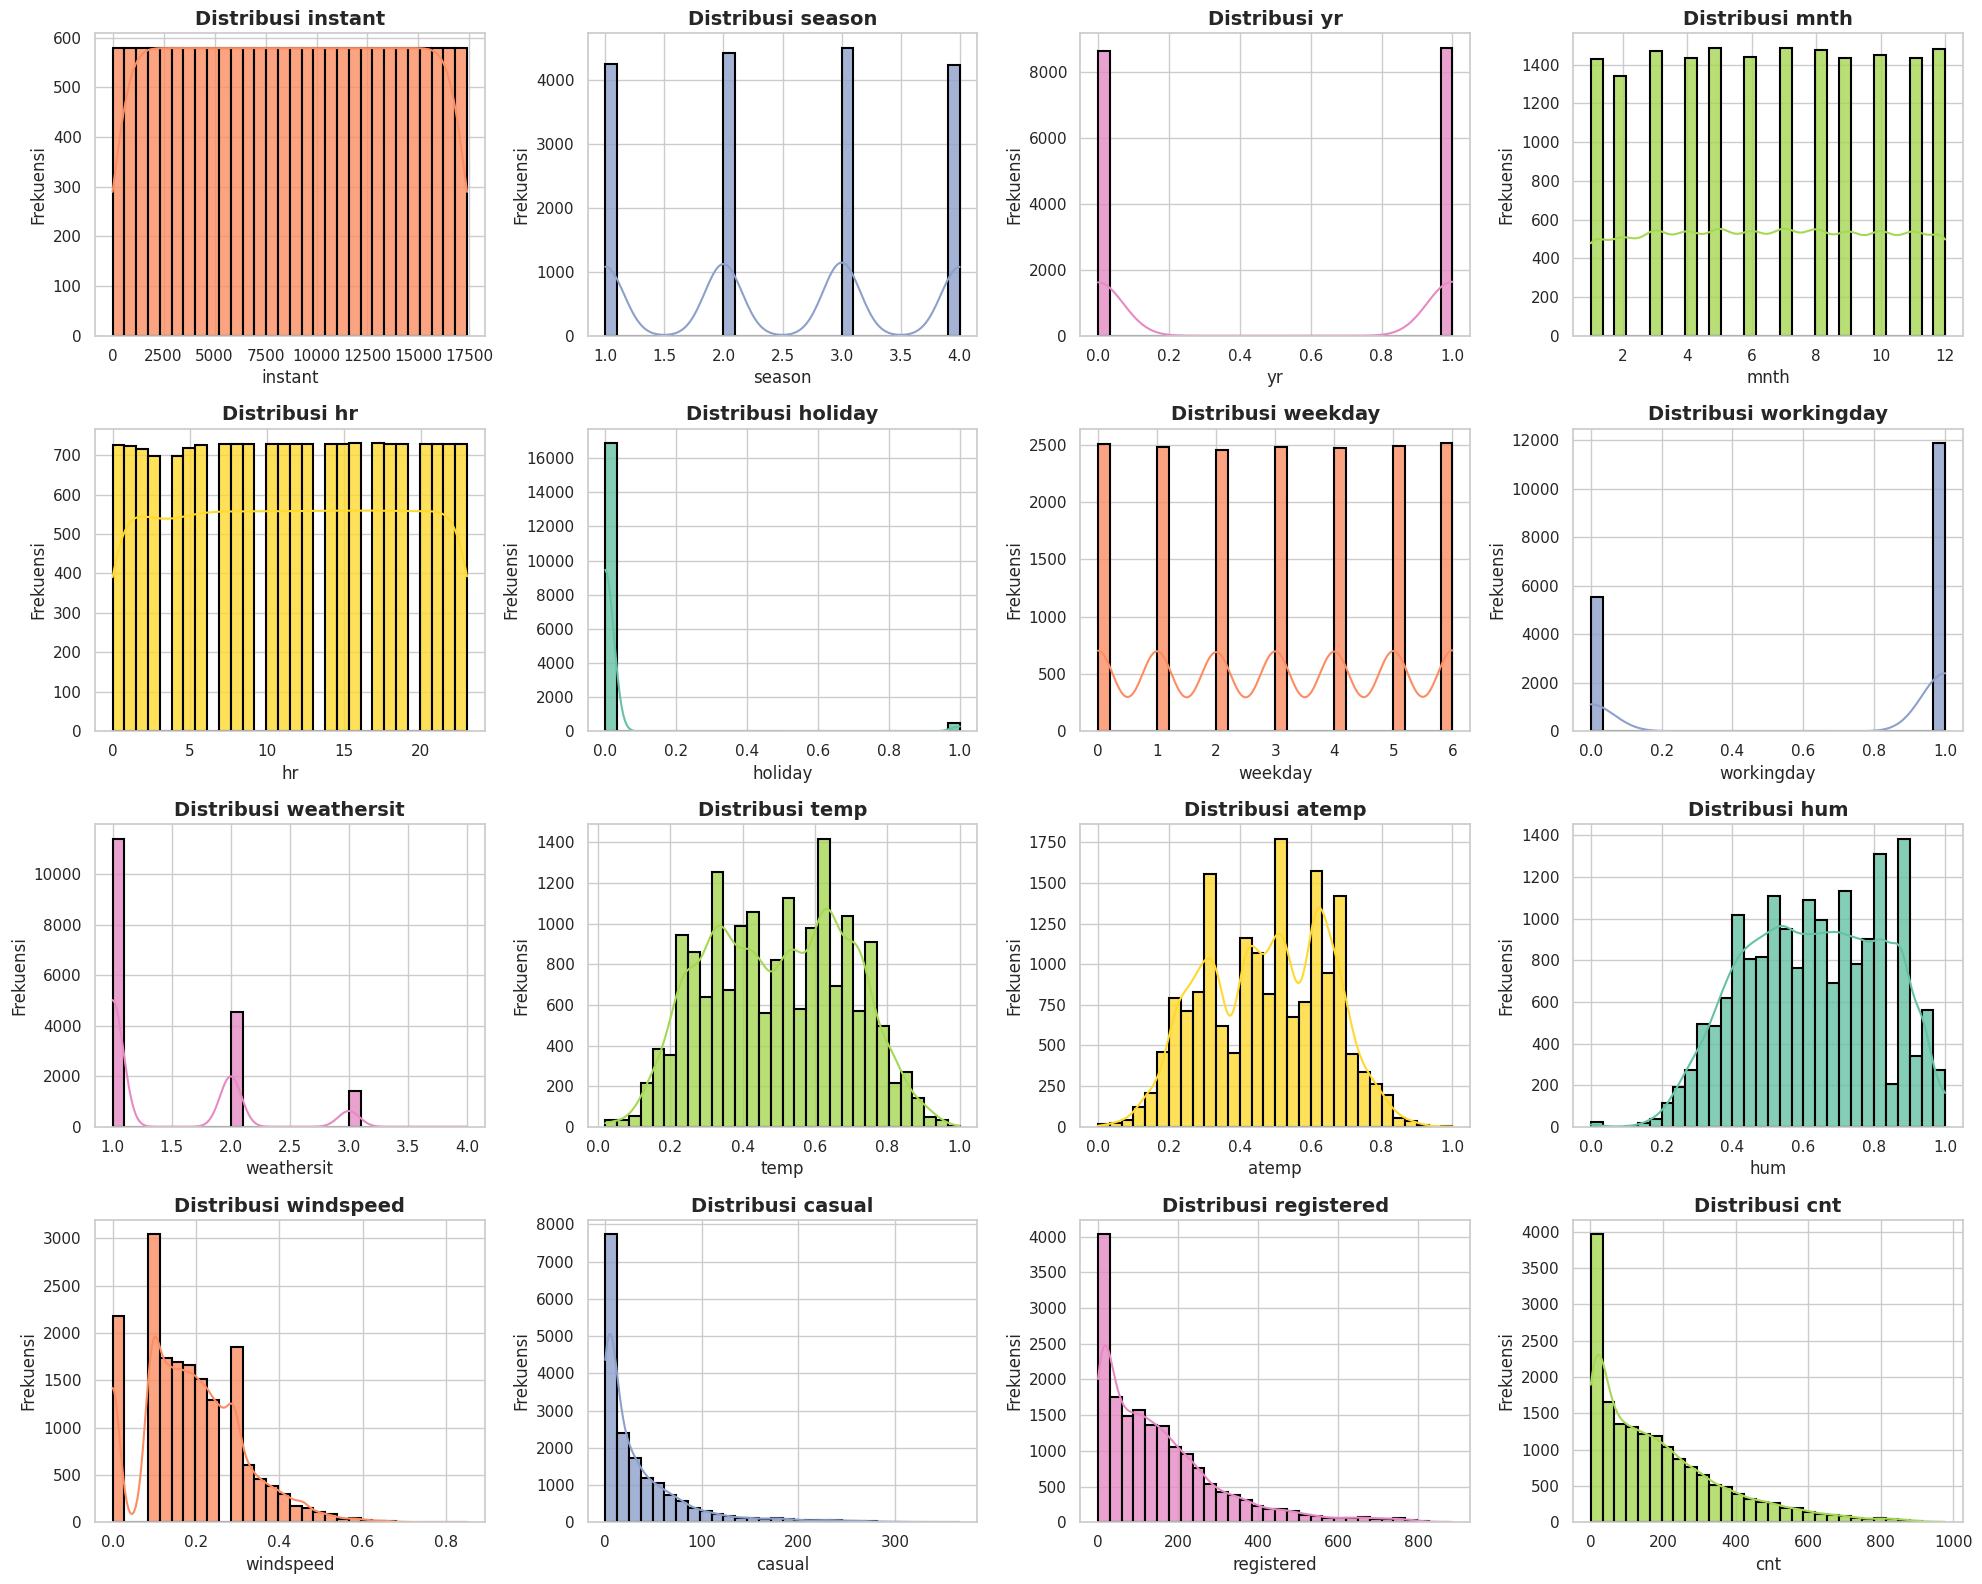

In [46]:
sns.set_theme(style="whitegrid")
numeric_columns_day = hour_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns_day, 1):
    plt.subplot(4, 4, i)
    sns.histplot(hour_data[column], bins=30, kde=True, color=sns.color_palette("Set2")[i % 6],
                 edgecolor='black', alpha=0.8, linewidth=1.5)
    plt.title(f'Distribusi {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()



**Distribusi Instant**: Menunjukkan variasi yang signifikan dengan puncaknya sekitar nilai 15.000, yang menandakan adanya fluktuasi besar dalam data ini.

**Distribusi Season**: Puncaknya berada di nilai 3, yang menunjukkan bahwa musim gugur (fall) adalah yang paling sering terjadi dalam dataset.

**Distribusi Yr**: Menunjukkan rentang nilai yang lebar, dengan puncak sekitar 0.4, menunjukkan bahwa tahun 2013 memiliki frekuensi yang lebih tinggi.

**Distribusi Mnth**: Menunjukkan pola yang naik turun, dengan puncak pada bulan ke-6 dan ke-9, yang menandakan variasi peminjaman sepeda yang cukup besar di bulan-bulan tersebut.

**Distribusi Weathersit**: Nilai yang paling sering muncul adalah 1, menunjukkan bahwa kondisi cuaca "Cerah, Sedikit berawan, atau Berawan sebagian" lebih dominan.

**Distribusi Temp (Suhu)**: Polanya menyerupai distribusi normal, dengan suhu yang paling sering berada di kisaran 20-30 derajat Celsius.

**Distribusi Atemp (Suhu yang Dirasakan)**: Distribusi suhu yang dirasakan juga mengikuti pola normal, dengan kisaran yang sama, yaitu 20-30 derajat Celsius.

**Distribusi Hum (Kelembaban)**: Kelembaban menunjukkan pola distribusi normal, dengan nilai yang sering berada di rentang 40-80%.

**Distribusi Windspeed (Kecepatan Angin)**: Tidak menunjukkan pola distribusi normal, namun kecepatan angin yang paling umum berada di kisaran 10-30 km/jam.

**Distribusi Casual (Pengguna Casual)**: Tidak mengikuti pola distribusi normal, dengan puncak pengguna casual berada di kisaran 3.000-4.000.

**Distribusi Registered (Pengguna Terdaftar)**: Distribusi pengguna terdaftar juga tidak mengikuti pola normal, dengan jumlah yang sering berada di sekitar 2.000-3.000 pengguna.

**Distribusi Cnt (Jumlah Total Pengguna)**: Tidak mengikuti pola normal, dengan jumlah total pengguna paling sering berada di kisaran 3.000-4.000 pengguna.

## **2.3 Korelasi Variabel**

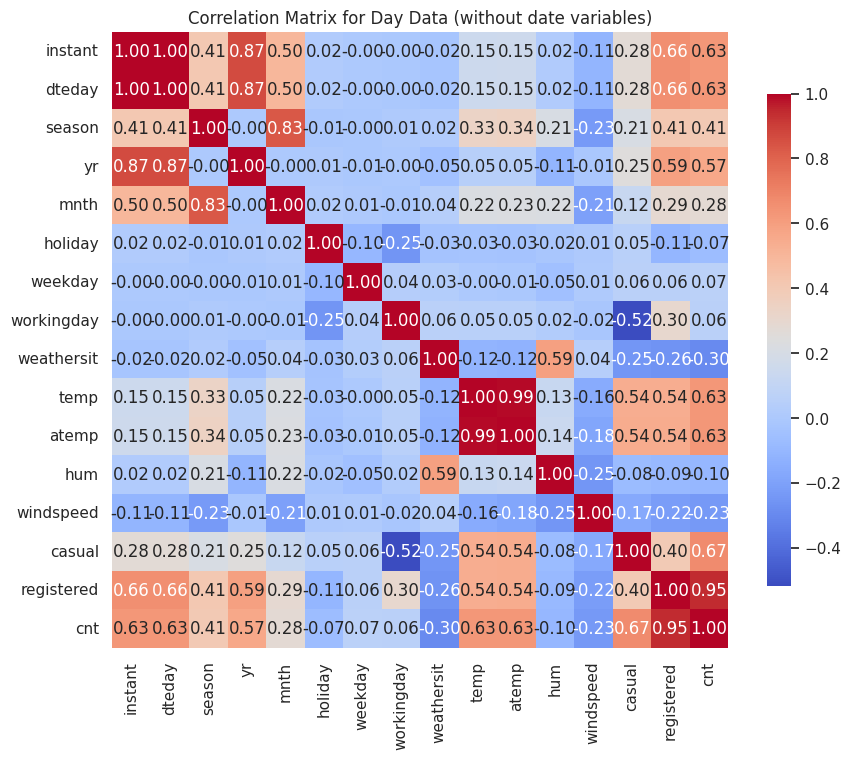

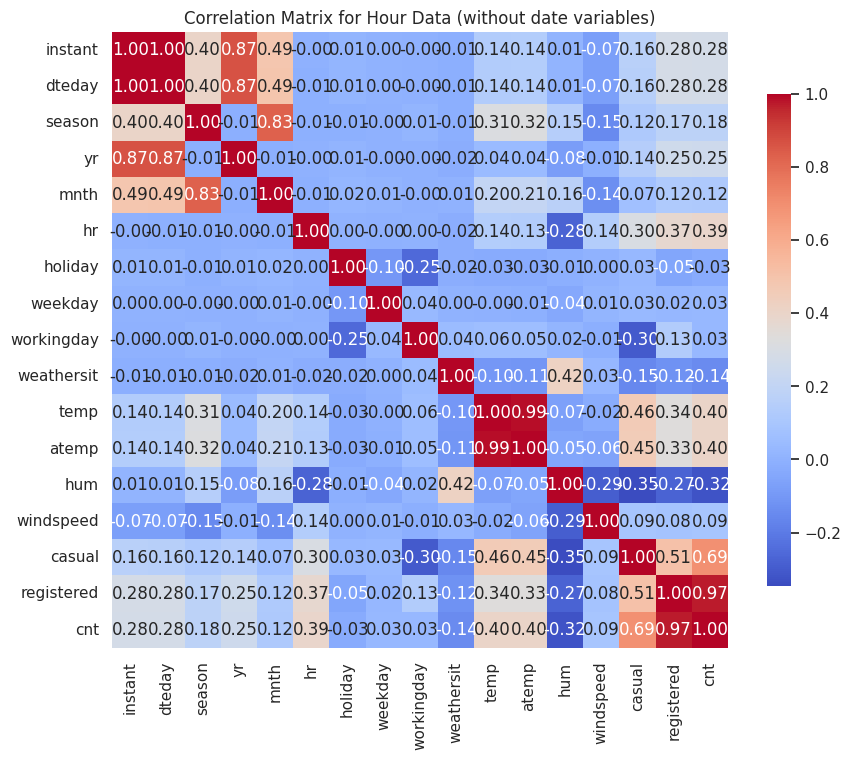

In [47]:
# Korelasi antar fitur day dan hour
correlation_day = day_data.corr()
correlation_hour = hour_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_day, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Day Data (without date variables)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hour, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Hour Data (without date variables)')
plt.show()




**Variabel dengan korelasi tertinggi terhadap jumlah penyewaan sepeda**

In [48]:
highest_corr = correlation_hour['cnt'].sort_values(ascending=False)
print("\nHighest correlated variables with 'cnt' in hour data:")
print(highest_corr)


Highest correlated variables with 'cnt' in hour data:
cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [49]:
highest_corr = correlation_day['cnt'].sort_values(ascending=False)
print("\nHighest correlated variables with 'cnt' in hour data:")
print(highest_corr)


Highest correlated variables with 'cnt' in hour data:
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


# **Kesimpulan:**
Faktor terbesar yang memengaruhi jumlah peminjaman sepeda adalah pengguna terdaftar (registered), yang menunjukkan bahwa platform sepeda lebih banyak digunakan oleh pengguna setia dibandingkan pengguna kasual.
Suhu dan jam dalam sehari juga berperan penting dalam mempengaruhi peminjaman sepeda.
Faktor-faktor seperti kelembaban dan kondisi cuaca buruk memiliki dampak negatif, sedangkan status hari kerja atau libur tidak begitu berpengaruh.

# **Menjawab pertanyaan bisnis**

## **1. Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda**

<ipython-input-50-eb475bde007a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, palette='coolwarm')


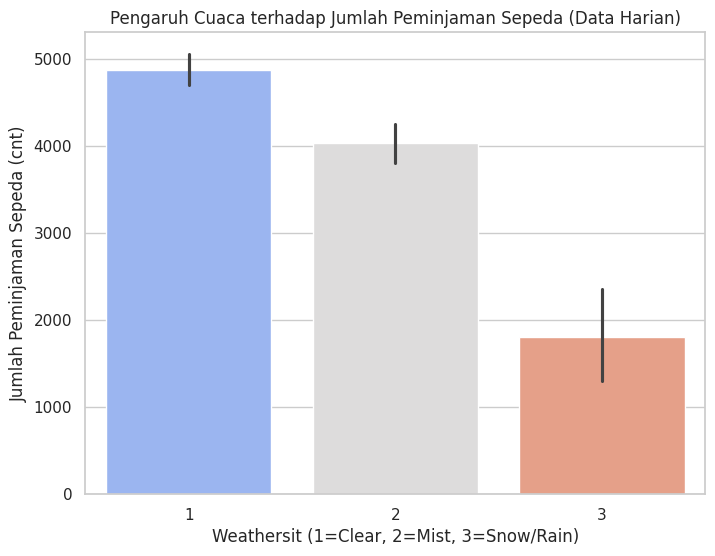

In [50]:
# Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda pada data day.csv
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda (Data Harian)')
plt.xlabel('Weathersit (1=Clear, 2=Mist, 3=Snow/Rain)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()


**Interpretasi Visualisasi**:

Visualisasi bar plot di atas menunjukkan hubungan yang jelas antara kondisi cuaca (weathersit) dan jumlah peminjaman sepeda. Terdapat tiga kategori cuaca:

1. **Clear (Cerah)**: Jumlah peminjaman sepeda paling tinggi pada kondisi cuaca cerah. Ini menunjukkan bahwa sebagian besar orang lebih memilih untuk menyewa sepeda ketika cuaca cerah dan mendukung aktivitas luar ruangan.

2. **Mist (Kabut)**: Jumlah peminjaman sepeda masih cukup tinggi pada kondisi berkabut, meskipun lebih rendah dibandingkan cuaca cerah. Hal ini mengindikasikan bahwa kabut tidak terlalu menghambat aktivitas bersepeda.

3. **Snow/Rain (Salju/Hujan)**: Jumlah peminjaman sepeda paling rendah pada kondisi bersalju atau hujan. Ini menunjukkan bahwa cuaca buruk seperti salju atau hujan secara signifikan mengurangi minat masyarakat untuk menyewa sepeda.
Garis error bar pada setiap batang menunjukkan rentang nilai atau variabilitas data. Garis error bar yang lebih panjang mengindikasikan bahwa ada lebih banyak variasi dalam jumlah peminjaman sepeda pada kondisi cuaca tersebut.

## **2. Pengaruh Musim terhadap Jumlah Peminjaman Sepeda (Season vs Cnt)**

<ipython-input-51-2db688af4773>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, palette='Set2')


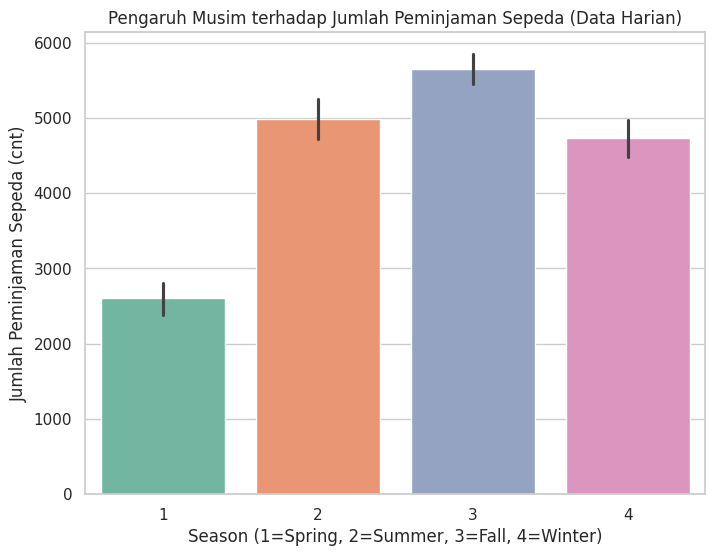

In [51]:
# Pengaruh Musim terhadap Jumlah Peminjaman Sepeda pada data day.csv
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=day_data, palette='Set2')
plt.title('Pengaruh Musim terhadap Jumlah Peminjaman Sepeda (Data Harian)')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()


**Interpretasi Visualisasi**:

Visualisasi bar plot di atas menunjukkan hubungan yang jelas antara musim dan jumlah peminjaman sepeda. Terdapat empat kategori musim:

1. **Spring (Musim Semi)**: Jumlah peminjaman sepeda cenderung lebih rendah pada musim semi.

2. **Summer (Musim Panas)**: Jumlah peminjaman sepeda meningkat secara signifikan pada musim panas. Ini menunjukkan bahwa banyak orang lebih memilih bersepeda saat cuaca hangat dan cerah.

3. **Fall (Musim Gugur)**: Jumlah peminjaman sepeda masih cukup tinggi pada musim gugur, meskipun sedikit menurun dibandingkan musim panas.

4. **Winter (Musim Dingin)**: Jumlah peminjaman sepeda kembali menurun pada musim dingin, kemungkinan besar karena cuaca dingin dan kondisi jalan yang kurang mendukung untuk bersepeda.
Garis error bar pada setiap batang menunjukkan rentang nilai atau variabilitas data. Garis error bar yang lebih panjang mengindikasikan bahwa ada lebih banyak variasi dalam jumlah peminjaman sepeda pada musim tersebut.

# **Kesimpulan dan Implikasi Bisnis**

Analisis terhadap data peminjaman sepeda telah mengungkapkan beberapa temuan penting yang dapat menjadi dasar pengambilan keputusan bisnis.

- **Pengaruh Cuaca dan Musim**: Cuaca cerah dan musim panas menjadi faktor pendorong utama peningkatan jumlah peminjaman sepeda. Sebaliknya, cuaca buruk dan musim dingin cenderung menurunkan minat masyarakat untuk menyewa sepeda. Implikasinya, perusahaan perlu menyesuaikan persediaan sepeda, strategi promosi, dan bahkan mempertimbangkan produk tambahan seperti jas hujan atau sepeda listrik untuk musim dingin.

- **Perbedaan Tipe Pelanggan**: Pelanggan casual dan registered memiliki pola penggunaan yang berbeda. Pelanggan casual cenderung lebih impulsif, sementara registered lebih stabil. Hal ini mengindikasikan perlunya strategi pemasaran yang berbeda untuk masing-masing segmen. Misalnya, menawarkan program loyalitas untuk pelanggan registered dan promosi jangka pendek untuk menarik pelanggan casual.

- **Peran Suhu**: Suhu memiliki korelasi positif dengan jumlah peminjaman sepeda, terutama pada musim semi dan gugur. Ini menunjukkan pentingnya mempertimbangkan faktor cuaca dalam perencanaan bisnis.

**Implikasi Bisnis Secara Umum**:

- Perencanaan yang Lebih Baik: Dengan memahami faktor-faktor yang mempengaruhi jumlah peminjaman sepeda, perusahaan dapat melakukan perencanaan yang lebih baik, baik dalam hal persediaan sepeda maupun sumber daya manusia.

- Strategi Pemasaran yang Efektif: Perusahaan dapat mengembangkan strategi pemasaran yang lebih targeted, dengan mempertimbangkan segmen pelanggan, musim, dan kondisi cuaca.

- Pengembangan Produk yang Inovatif: Perusahaan dapat mempertimbangkan untuk mengembangkan produk atau layanan baru yang dapat memenuhi kebutuhan pelanggan yang berbeda-beda.

- Pengambilan Keputusan yang Data-Driven: Semua keputusan bisnis dapat didasarkan pada data yang akurat dan analisis yang mendalam.